In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sns
from sklearn import svm

In [2]:
df = pd.read_csv('bank_data.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [9]:
dim = df.shape
print(dim)

(614, 13)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

<Axes: >

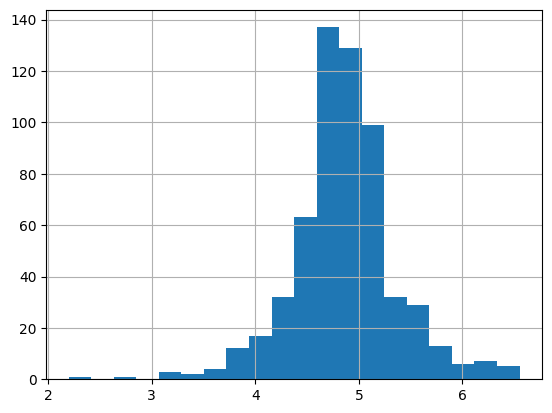

In [12]:
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

In [16]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log       22
dtype: int64

<Axes: >

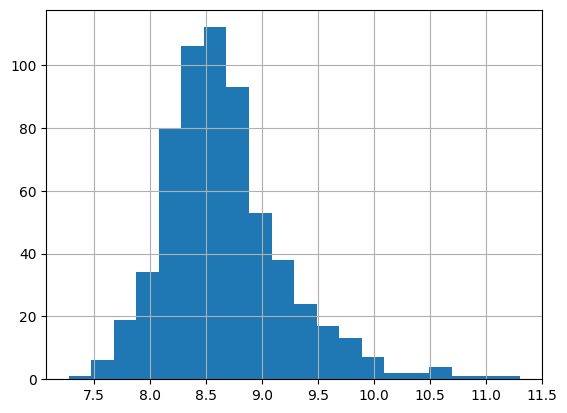

In [17]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['TotalIncome_log'].hist(bins = 20)

In [34]:
mode = df['Gender'].mode()[0]
df.fillna({'Gender': mode}, inplace=True)

mode = df['Married'].mode()[0]
df.fillna({'Married': mode}, inplace=True)

mode = df['Dependents'].mode()[0]
df.fillna({'Dependents': mode}, inplace=True)

mode = df['Self_Employed'].mode()[0]
df.fillna({'Self_Employed': mode}, inplace=True)

mean = df['LoanAmount'].mean()
df.fillna({'LoanAmount': float(mean)}, inplace=True)

mode = df['Loan_Amount_Term'].mode()[0]
df.fillna({'Loan_Amount_Term': mode}, inplace=True)

mode = df['Credit_History'].mode()[0]
df.fillna({'Credit_History': mode}, inplace=True)

mean = df['LoanAmount_log'].mean()
df.fillna({'LoanAmount_log': float(mean)}, inplace=True)

#[0] is to get the first item from the list 

In [35]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
TotalIncome          0
TotalIncome_log      0
dtype: int64

In [37]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y,4.787492,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  LoanAmount_log     614 non-null    float64
 14  TotalIncome        614 non-null    float64
 15  TotalIncome_log    614 non-null    float64
dtypes: float64(7), int64(1), o

In [103]:
x = df.iloc[:,np.r_[1:5,9:11,13:15]].values
y = df.iloc[:,12].values

#iloc is from pandas so we can retrieve any value

In [40]:
x

array([['Male', 'No', '0', ..., 1.0, 4.787491742782046, 5849.0],
       ['Male', 'Yes', '1', ..., 1.0, 4.852030263919617, 6091.0],
       ['Male', 'Yes', '0', ..., 1.0, 4.189654742026425, 3000.0],
       ...,
       ['Male', 'Yes', '1', ..., 1.0, 5.53338948872752, 8312.0],
       ['Male', 'Yes', '2', ..., 1.0, 5.231108616854587, 7583.0],
       ['Female', 'No', '0', ..., 0.0, 4.890349128221754, 4583.0]],
      dtype=object)

In [45]:
print('Perc of missing gender is %2f%%' %((df['Gender'].isnull().sum()/df.shape[0])*100))

Perc of missing gender is 0.000000%


Number of people who take loan as group by gender: 
Gender
Male      502
Female    112
Name: count, dtype: int64


C:\Users\Prarthana\AppData\Local\Temp\ipykernel_3592\923345166.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Gender', data = df, palette = 'Set1')


<Axes: xlabel='Gender', ylabel='count'>

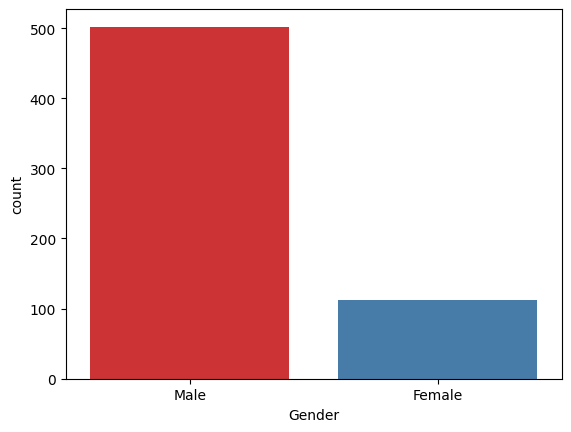

In [57]:
import seaborn as sns

print('Number of people who take loan as group by gender: ')
print(df['Gender'].value_counts())
sns.countplot(x = 'Gender', data = df, palette = 'Set1')

<Axes: xlabel='Gender', ylabel='count'>

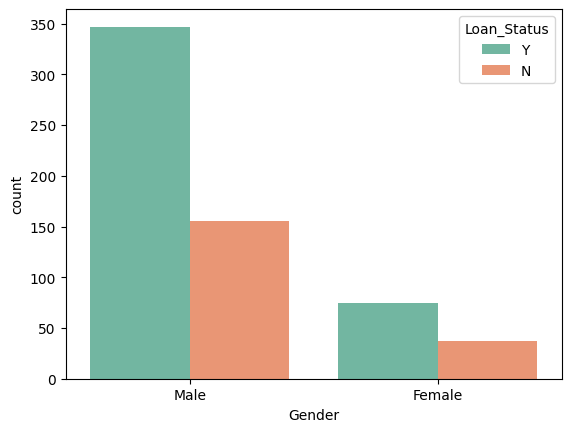

In [66]:
sns.countplot(x = 'Gender', data = df, hue = 'Loan_Status', palette = 'Set2')

Number of people who take loan as group by marital status: 
Married
Yes    401
No     213
Name: count, dtype: int64


C:\Users\Prarthana\AppData\Local\Temp\ipykernel_3592\3264621557.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Married', data = df, palette = 'Set1')


<Axes: xlabel='Married', ylabel='count'>

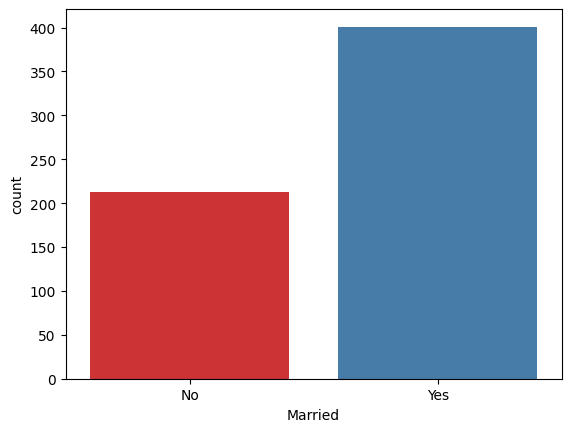

In [56]:
print('Number of people who take loan as group by marital status: ')
print(df['Married'].value_counts())
sns.countplot(x = 'Married', data = df, palette = 'Set1')

<Axes: xlabel='Married', ylabel='count'>

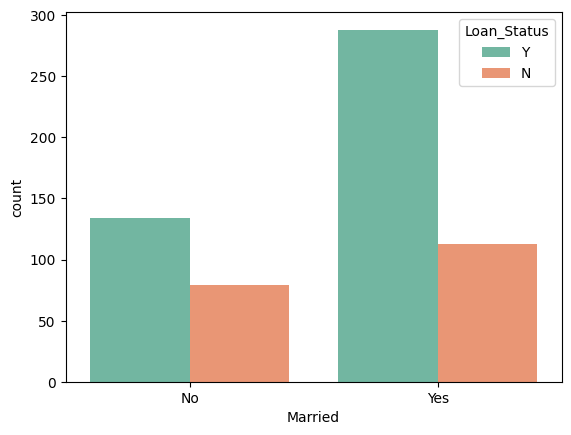

In [65]:
sns.countplot(x = 'Married', data = df, hue = 'Loan_Status', palette = 'Set2')

Number of people who take loan as group by dependents: 
Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64


C:\Users\Prarthana\AppData\Local\Temp\ipykernel_3592\118409427.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Dependents', data = df, palette = 'Set1')


<Axes: xlabel='Dependents', ylabel='count'>

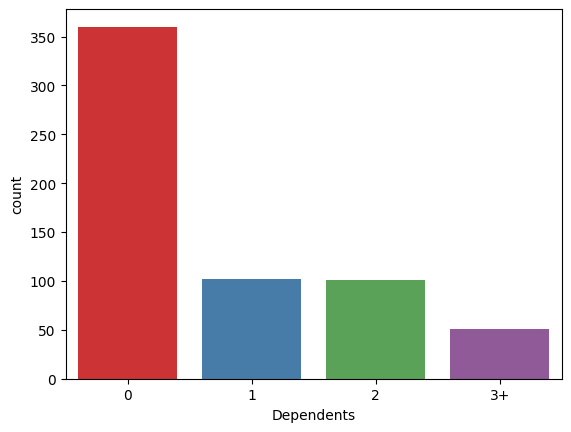

In [59]:
print('Number of people who take loan as group by dependents: ')
print(df['Dependents'].value_counts())
sns.countplot(x = 'Dependents', data = df, palette = 'Set1')

<Axes: xlabel='Dependents', ylabel='count'>

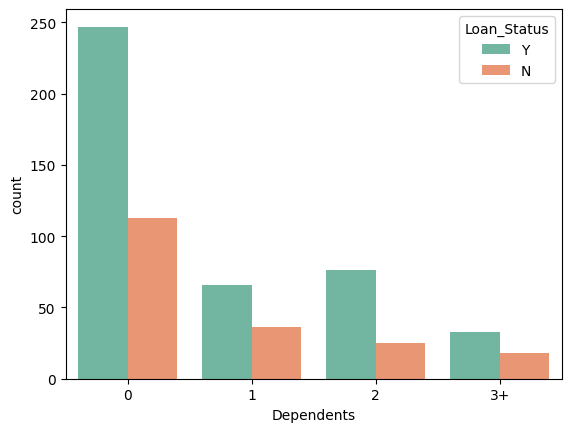

In [64]:
sns.countplot(x = 'Dependents', data = df, hue = 'Loan_Status', palette = 'Set2')

Number of people who take loan as group by education: 
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64


C:\Users\Prarthana\AppData\Local\Temp\ipykernel_3592\4077225804.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Education', data = df, palette = 'Set1')


<Axes: xlabel='Education', ylabel='count'>

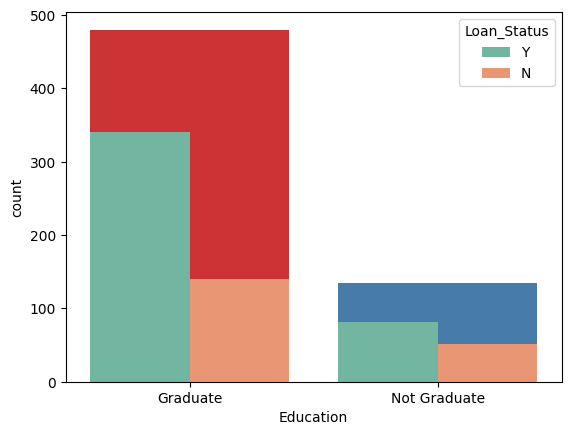

In [67]:
print('Number of people who take loan as group by education: ')
print(df['Education'].value_counts())
sns.countplot(x = 'Education', data = df, palette = 'Set1')
sns.countplot(x = 'Education', data = df, hue = 'Loan_Status', palette = 'Set2')

Modelling

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

from sklearn.preprocessing import LabelEncoder
LabelEncoder_x = LabelEncoder()

In [75]:
for i in range(0,5):
    X_train[:,i]= LabelEncoder_x.fit_transform(X_train[:,1])
    X_train[:,7]= LabelEncoder_x.fit_transform(X_train[:,7])

X_train

array([[1, 1, 1, ..., 1.0, 4.875197323201151, 267],
       [0, 0, 0, ..., 1.0, 5.278114659230517, 407],
       [1, 1, 1, ..., 0.0, 5.003946305945459, 249],
       ...,
       [1, 1, 1, ..., 1.0, 5.298317366548036, 363],
       [1, 1, 1, ..., 1.0, 5.075173815233827, 273],
       [1, 1, 1, ..., 1.0, 5.204006687076795, 301]], dtype=object)

In [76]:
LabelEncoder_y = LabelEncoder()
y_train = LabelEncoder_y.fit_transform(y_train)

y_train

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [78]:
for i in range(0,5):
    X_test[:,i] = LabelEncoder_x.fit_transform(X_test[:,i])
    X_test[:,7] = LabelEncoder_x.fit_transform(X_test[:,7])

X_test

array([[1, 0, 0, 0, 5, 1.0, 4.430816798843313, 85],
       [0, 0, 0, 0, 5, 1.0, 4.718498871295094, 28],
       [1, 1, 0, 0, 5, 1.0, 5.780743515792329, 104],
       [1, 1, 0, 0, 5, 1.0, 4.700480365792417, 80],
       [1, 1, 2, 0, 5, 1.0, 4.574710978503383, 22],
       [1, 1, 0, 1, 3, 0.0, 5.10594547390058, 70],
       [1, 1, 3, 0, 3, 1.0, 5.056245805348308, 77],
       [1, 0, 0, 0, 5, 1.0, 6.003887067106539, 114],
       [1, 0, 0, 0, 5, 0.0, 4.820281565605037, 53],
       [1, 1, 0, 0, 5, 1.0, 4.852030263919617, 55],
       [0, 0, 0, 0, 5, 1.0, 4.430816798843313, 4],
       [1, 1, 1, 0, 5, 1.0, 4.553876891600541, 2],
       [0, 0, 0, 0, 5, 1.0, 5.634789603169249, 96],
       [1, 1, 2, 0, 5, 1.0, 5.4638318050256105, 97],
       [1, 1, 0, 0, 5, 1.0, 4.564348191467836, 117],
       [1, 1, 1, 0, 5, 1.0, 4.204692619390966, 22],
       [1, 0, 1, 1, 5, 1.0, 5.247024072160486, 32],
       [1, 0, 0, 1, 5, 1.0, 4.882801922586371, 25],
       [0, 0, 0, 0, 5, 1.0, 4.532599493153256, 1],
       [1, 1

In [79]:
LabelEncoder_y = LabelEncoder()
y_test = LabelEncoder_y.fit_transform(y_test)
y_test

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

In [81]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [82]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [84]:
from sklearn import metrics
y_pred = rf_clf.predict(X_test)

print('Accuracy of random forest classifier is ', metrics.accuracy_score(y_pred, y_test))

y_pred

Accuracy of random forest classifier is  0.7886178861788617


array([0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1])

In [88]:
#Try another classification

from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()
nb_clf.fit(X_train,y_train)

GaussianNB()

In [89]:
y_pred = nb_clf.predict(X_test)
print('Accuracy of naive bayes is %.', metrics.accuracy_score(y_pred,y_test))

Accuracy of naive bayes is %. 0.8292682926829268


In [90]:
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [91]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [93]:
y_pred = dt_clf.predict(X_test)
print('Accuracy of desicion tree is ', metrics.accuracy_score(y_pred,y_test))

Accuracy of desicion tree is  0.6910569105691057


In [94]:
y_pred

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1])

In [97]:
from sklearn.neighbors import KNeighborsClassifier

kn_clf = KNeighborsClassifier()
kn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [99]:
y_pred = kn_clf.predict(X_test)
print('Accuracy of KN is ', metrics.accuracy_score(y_pred, y_test))

Accuracy of KN is  0.8048780487804879


In [ ]:
#NB is good for prediction system